In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import time

Problem 1 part 1

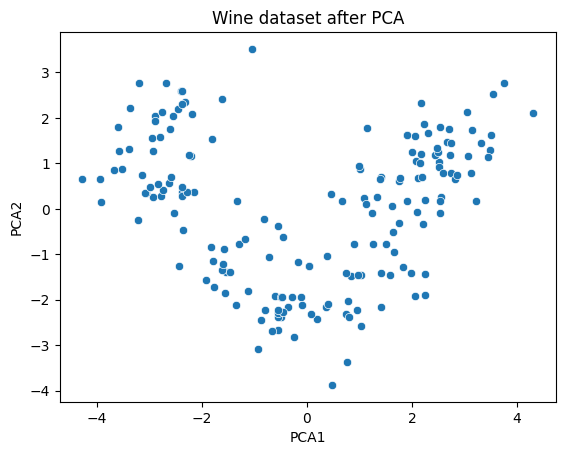

In [ ]:
    # select wine data from sklearn.
    df = load_wine(as_frame=True)
    df = df.frame

    # drop the target column which is not being used for clustering.
    df.drop("target", axis=1, inplace=True)

    # scale features.
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(df)

    # apply PCA to reduce components to 2.
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_df)  # numpy type.
    pca_df = pd.DataFrame(data=pca_data, columns=["PCA1", "PCA2"])  # df type.

    # plot data after PCA.
    sns.scatterplot(x="PCA1", y="PCA2", data=pca_df)
    plt.title("Wine dataset after PCA")
    plt.tight_layout
    plt.show()

Problem 1 part 2

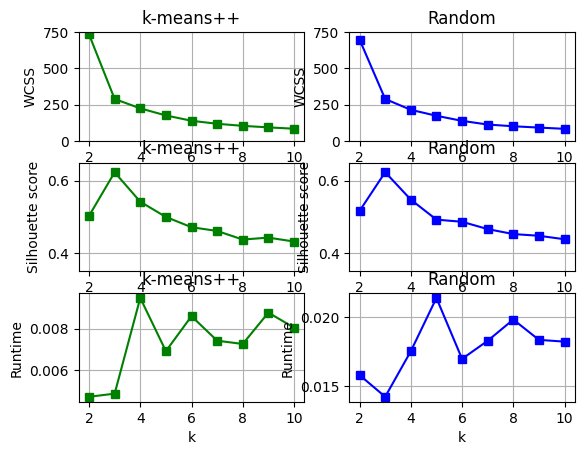

In [ ]:
    # Part 2 ===========================================================
    k_values = list(range(2, 11))
    wcss_plus_total = np.zeros(9)
    wcss_rnd_total = np.zeros(9)
    score_plus_total = np.zeros(9)
    score_rnd_total = np.zeros(9)
    time_plus_total = np.zeros(9)
    time_rnd_total = np.zeros(9)
    for j in range(0, 10):
        wcss_plus = []
        wcss_rnd = []
        score_plus = []
        score_rnd = []
        time_plus = []
        time_rnd = []
        for i in range(2, 11):
            start_time = time.time()
            kmeans_plus = KMeans(n_clusters=i, init="k-means++")
            kmeans_plus.fit(pca_data)
            wcss_plus.append(kmeans_plus.inertia_)
            score_plus.append(silhouette_score(pca_data, kmeans_plus.labels_))
            end_time = time.time()
            time_plus.append(end_time - start_time)

        for i in range(2, 11):
            start_time = time.time()
            kmeans_rnd = KMeans(n_clusters=i, init="random")
            kmeans_rnd.fit(pca_data)
            wcss_rnd.append(kmeans_rnd.inertia_)
            score_rnd.append(silhouette_score(pca_data, kmeans_rnd.labels_))
            end_time = time.time()
            time_rnd.append(end_time - start_time)

        wcss_plus_total = wcss_plus_total + np.array(wcss_plus)
        wcss_rnd_total = wcss_rnd_total + np.array(wcss_rnd)
        score_plus_total = score_plus_total + np.array(score_plus)
        score_rnd_total = score_rnd_total + np.array(score_rnd)
        time_plus_total = time_plus_total + np.array(time_plus)
        time_rnd_total = time_rnd_total + np.array(time_rnd)

    wcss_plus_avg = wcss_plus_total / 9
    wcss_rnd_avg = wcss_rnd_total / 9
    score_plus_avg = score_plus_total / 9
    score_rnd_avg = score_rnd_total / 9
    time_plus_avg = time_plus_total / 9
    time_rnd_avg = time_rnd_total / 9

    plt.subplot(3, 2, 1)
    plt.plot(k_values, wcss_plus_avg, "gs-")
    plt.xlabel("k")
    plt.ylabel("WCSS")
    plt.title("k-means++")
    plt.grid(True)
    plt.ylim(0, 750)

    plt.subplot(3, 2, 2)
    plt.plot(k_values, wcss_rnd_avg, "bs-")
    plt.xlabel("k")
    plt.ylabel("WCSS")
    plt.title("Random")
    plt.grid(True)
    plt.ylim(0, 750)

    plt.subplot(3, 2, 3)
    plt.plot(k_values, score_plus_avg, "gs-")
    plt.xlabel("k")
    plt.ylabel("Silhouette score")
    plt.title("k-means++")
    plt.grid(True)
    plt.ylim(0.35, 0.65)

    plt.subplot(3, 2, 4)
    plt.plot(k_values, score_rnd_avg, "bs-")
    plt.xlabel("k")
    plt.ylabel("Silhouette score")
    plt.title("Random")
    plt.grid(True)
    plt.ylim(0.35, 0.65)

    plt.subplot(3, 2, 5)
    plt.plot(k_values, time_plus_avg, "gs-")
    plt.xlabel("k")
    plt.ylabel("Runtime")
    plt.title("k-means++")
    plt.grid(True)
    #plt.ylim(0, 0.01)

    plt.subplot(3, 2, 6)
    plt.plot(k_values, time_rnd_avg, "bs-")
    plt.xlabel("k")
    plt.ylabel("Runtime")
    plt.title("Random")
    plt.grid(True)
    #plt.ylim(0, 0.01)
    plt.tight_layout
    plt.show()

Problem 1 part 3

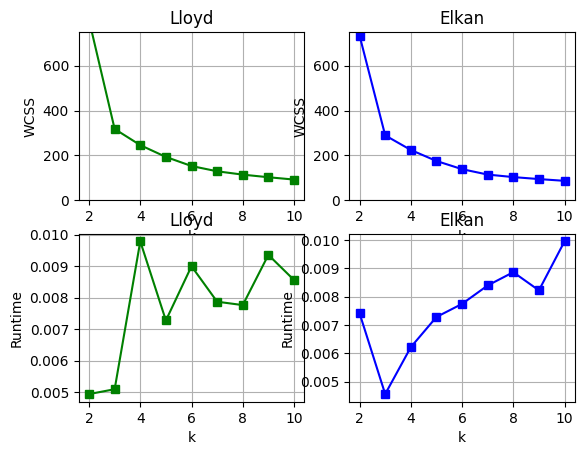

In [ ]:
    # Part 3 ===========================================================
    k_values = list(range(2, 11))
    wcss_lloyd_total = np.zeros(9)
    wcss_elkan_total = np.zeros(9)
    time_lloyd_total = np.zeros(9)
    time_elkan_total = np.zeros(9)
    for j in range(0, 10):
        wcss_lloyd = []
        wcss_elkan = []
        time_lloyd = []
        time_elkan = []
        for i in range(2, 11):
            start_time = time.time()
            kmeans_lloyd = KMeans(
                n_clusters=i,
                init="k-means++",
                algorithm="lloyd",
            )
            kmeans_lloyd.fit(pca_data)
            wcss_lloyd.append(kmeans_lloyd.inertia_)
            end_time = time.time()
            time_lloyd.append(end_time - start_time)

        for i in range(2, 11):
            start_time = time.time()
            kmeans_elkan = KMeans(
                n_clusters=i,
                init="k-means++",
                algorithm="elkan",
            )
            kmeans_elkan.fit(pca_data)
            wcss_elkan.append(kmeans_elkan.inertia_)
            end_time = time.time()
            time_elkan.append(end_time - start_time)

        wcss_lloyd_total = wcss_plus_total + np.array(wcss_lloyd)
        wcss_elkan_total = wcss_elkan_total + np.array(wcss_elkan)
        time_lloyd_total = time_plus_total + np.array(time_lloyd)
        time_elkan_total = time_elkan_total + np.array(time_elkan)

    wcss_lloyd_avg = wcss_lloyd_total / 9
    wcss_elkan_avg = wcss_elkan_total / 9
    time_lloyd_avg = time_lloyd_total / 9
    time_elkan_avg = time_elkan_total / 9

    plt.subplot(2, 2, 1)
    plt.plot(k_values, wcss_lloyd_avg, "gs-")
    plt.xlabel("k")
    plt.ylabel("WCSS")
    plt.title("Lloyd")
    plt.grid(True)
    plt.ylim(0, 750)

    plt.subplot(2, 2, 2)
    plt.plot(k_values, wcss_elkan_avg, "bs-")
    plt.xlabel("k")
    plt.ylabel("WCSS")
    plt.title("Elkan")
    plt.grid(True)
    plt.ylim(0, 750)

    plt.subplot(2, 2, 3)
    plt.plot(k_values, time_lloyd_avg, "gs-")
    plt.xlabel("k")
    plt.ylabel("Runtime")
    plt.title("Lloyd")
    plt.grid(True)
    #plt.ylim(0, 0.006)

    plt.subplot(2, 2, 4)
    plt.plot(k_values, time_elkan_avg, "bs-")
    plt.xlabel("k")
    plt.ylabel("Runtime")
    plt.title("Elkan")
    plt.grid(True)
    #plt.ylim(0, 0.006)
    plt.tight_layout
    plt.show()


Problem 2 setup

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage


def plot_agglo(X_scaled, link_choice=str):
    score_s = []
    score_chs = []
    for i in range(2, 11):
        agglo = AgglomerativeClustering(
            n_clusters=i,
            linkage=link_choice,
        )
        y_pred = agglo.fit_predict(X_scaled)
        agglo_model = agglo.fit(X_scaled)
        score_s.append(silhouette_score(X_scaled, agglo_model.labels_))
        score_chs.append(calinski_harabasz_score(X_scaled, agglo_model.labels_))

        plt.subplot(5, 2, i - 1)
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred)
        plt.title(f"Linkage = {link_choice} & Cluster = {i}")
    plt.tight_layout
    return score_s, score_chs


def plot_score(k, score, color):
    plt.plot(k, score, color)
    plt.xlabel("k")
    plt.ylabel("score")
    plt.grid(True)

Problem 2 plots

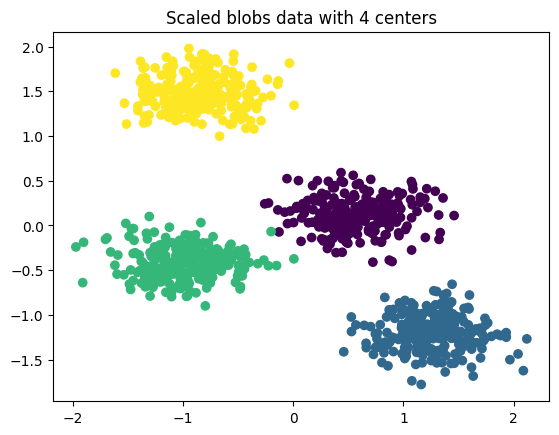

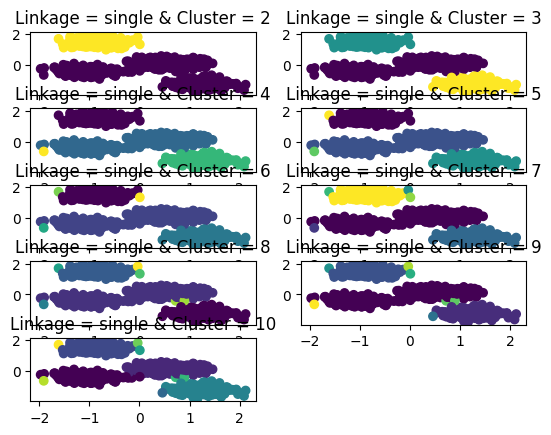

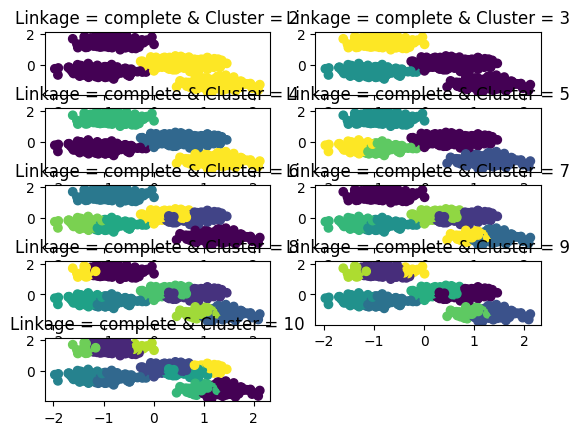

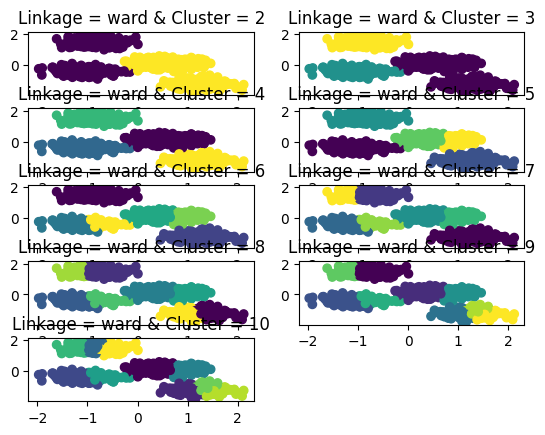

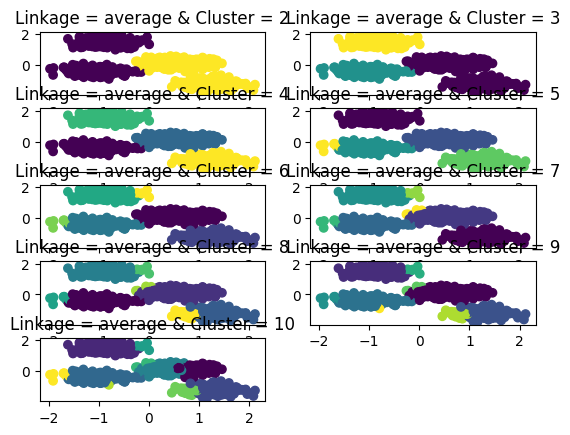

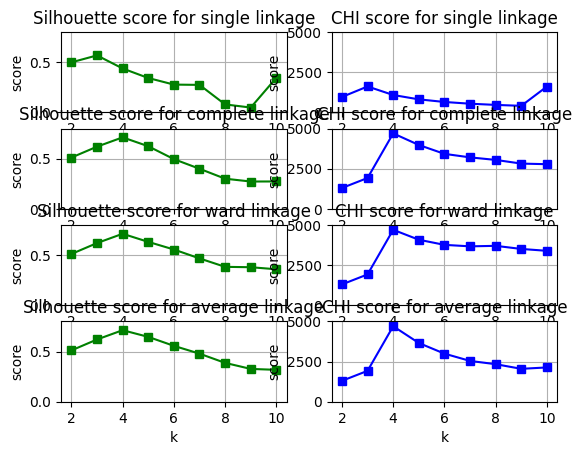

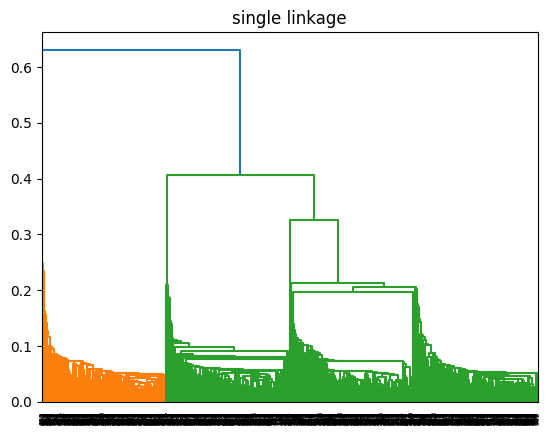

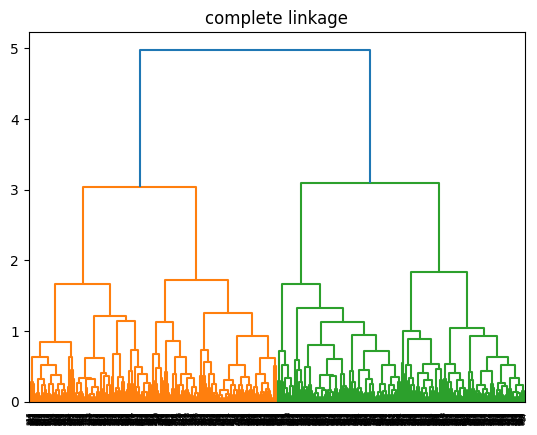

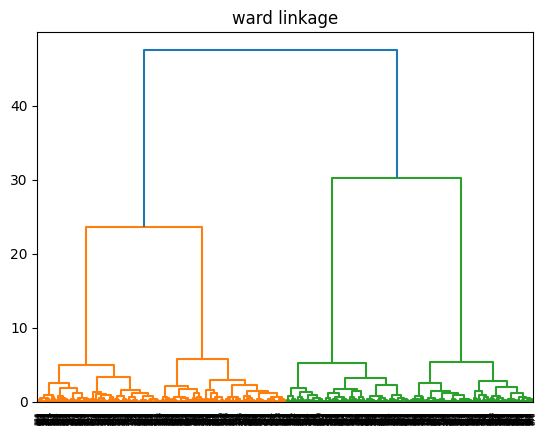

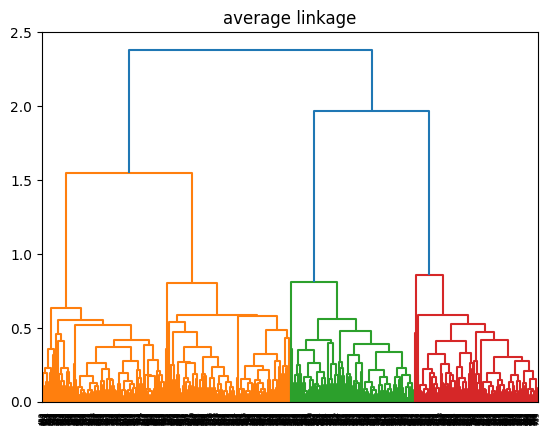

In [ ]:
    # Part 1 ==================================================================
    # generate sample data.
    X, y = make_blobs(n_samples=1000, centers=4, random_state=0, cluster_std=0.5)

    # scale the data.
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # plot scaled data.
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
    plt.title("Scaled blobs data with 4 centers")
    plt.show()

    # Part 2 ==================================================================
    link_type = ["single", "complete", "ward", "average"]
    k_values = list(range(2, 11))
    list_s = []
    list_chs = []
    for link in link_type:
        score_s, score_chs = plot_agglo(X_scaled, link_choice=link)
        plt.show()
        list_s.append(score_s)
        list_chs.append(score_chs)

    # Part 3 ==================================================================
    i = 0
    for link in link_type:
        i += 1
        plt.subplot(4, 2, 2 * i - 1)
        plot_score(k_values, list_s[i - 1], "gs-")
        plt.title(f"Silhouette score for {link} linkage")
        plt.ylim(0, 0.8)
        plt.subplot(4, 2, 2 * i)
        plot_score(k_values, list_chs[i - 1], "bs-")
        plt.title(f"CHI score for {link} linkage")
        plt.ylim(0, 5000)
    plt.show()

    # Part 4 ==================================================================
    for link in link_type:
        Z = linkage(X_scaled, link)
        dendrogram(Z)
        plt.title(f"{link} linkage")
        plt.show()

Probelm 2: complex data

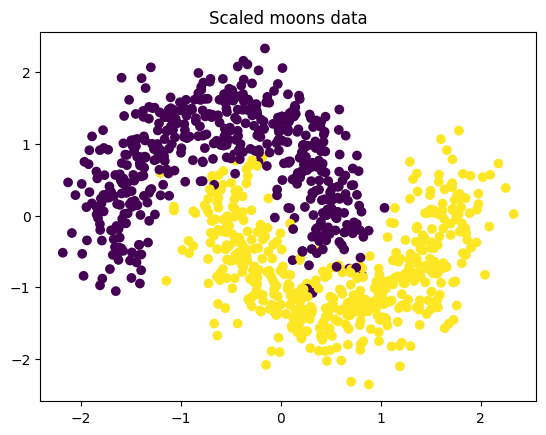

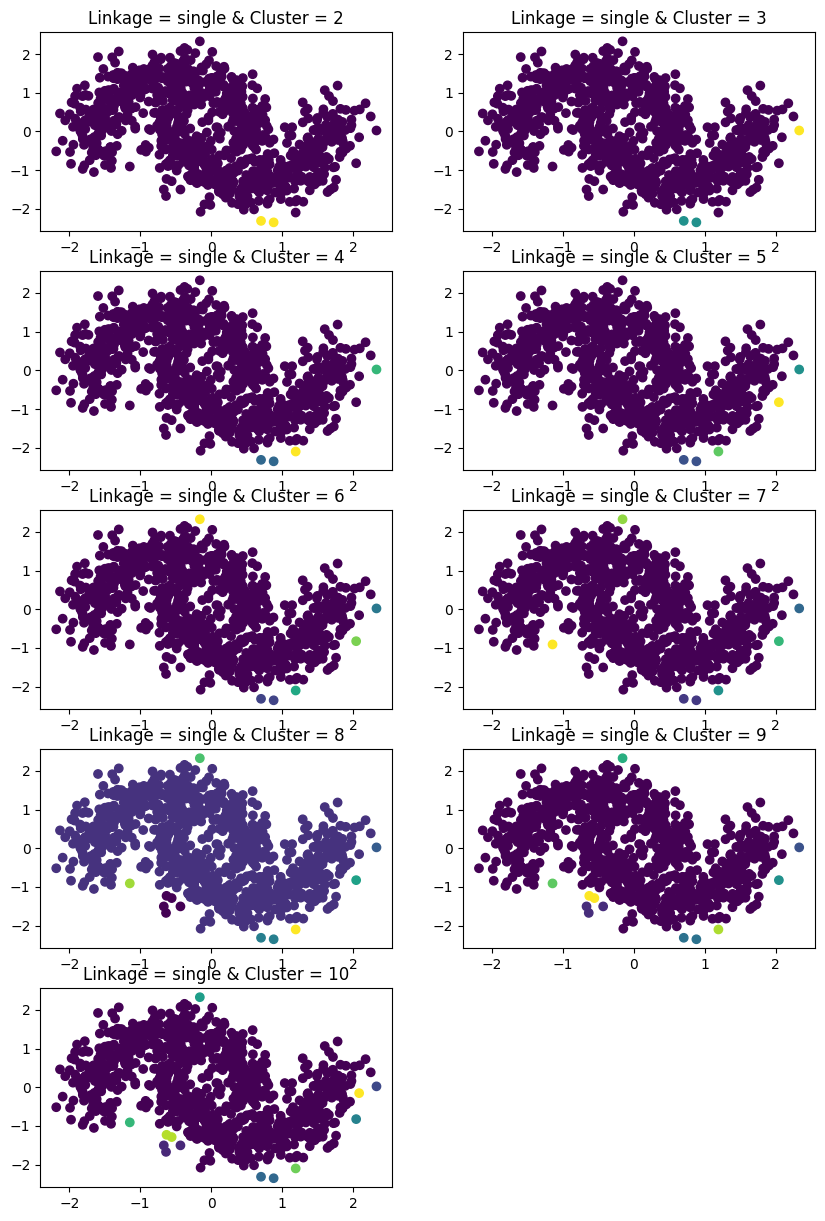

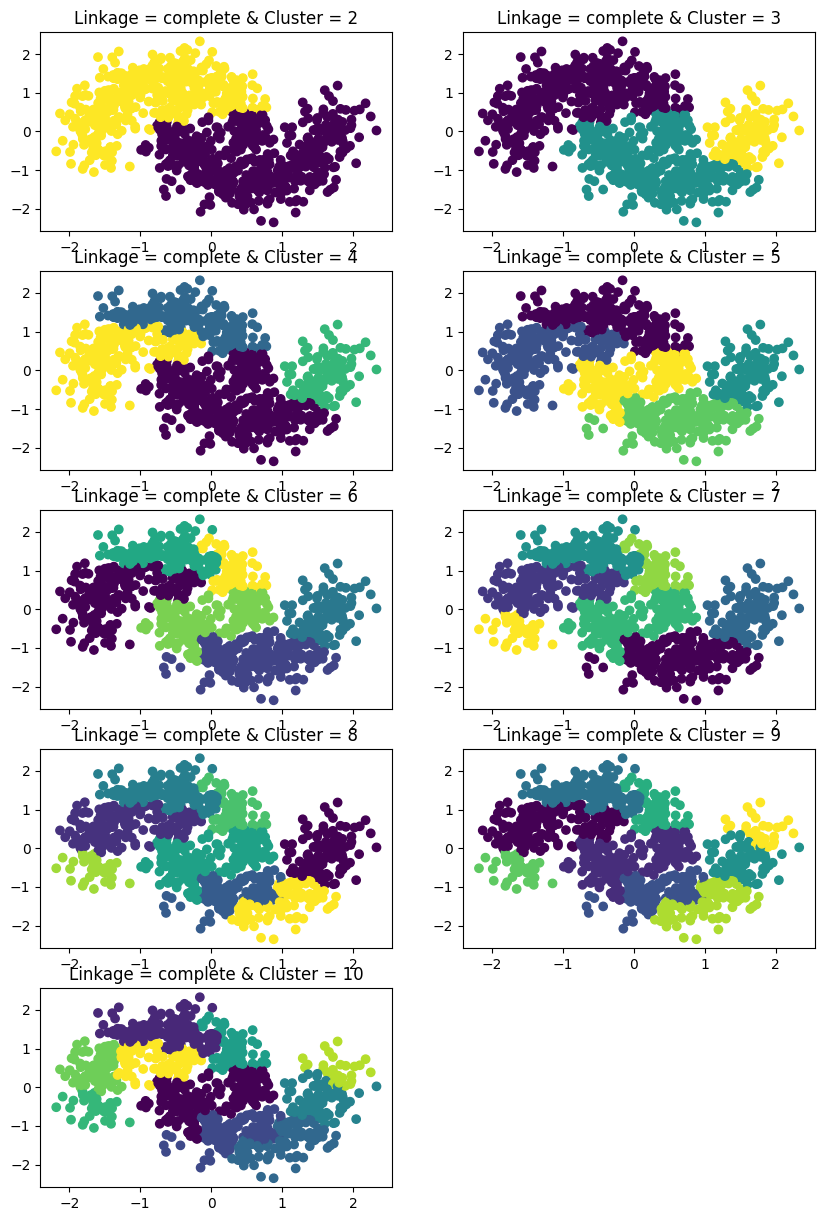

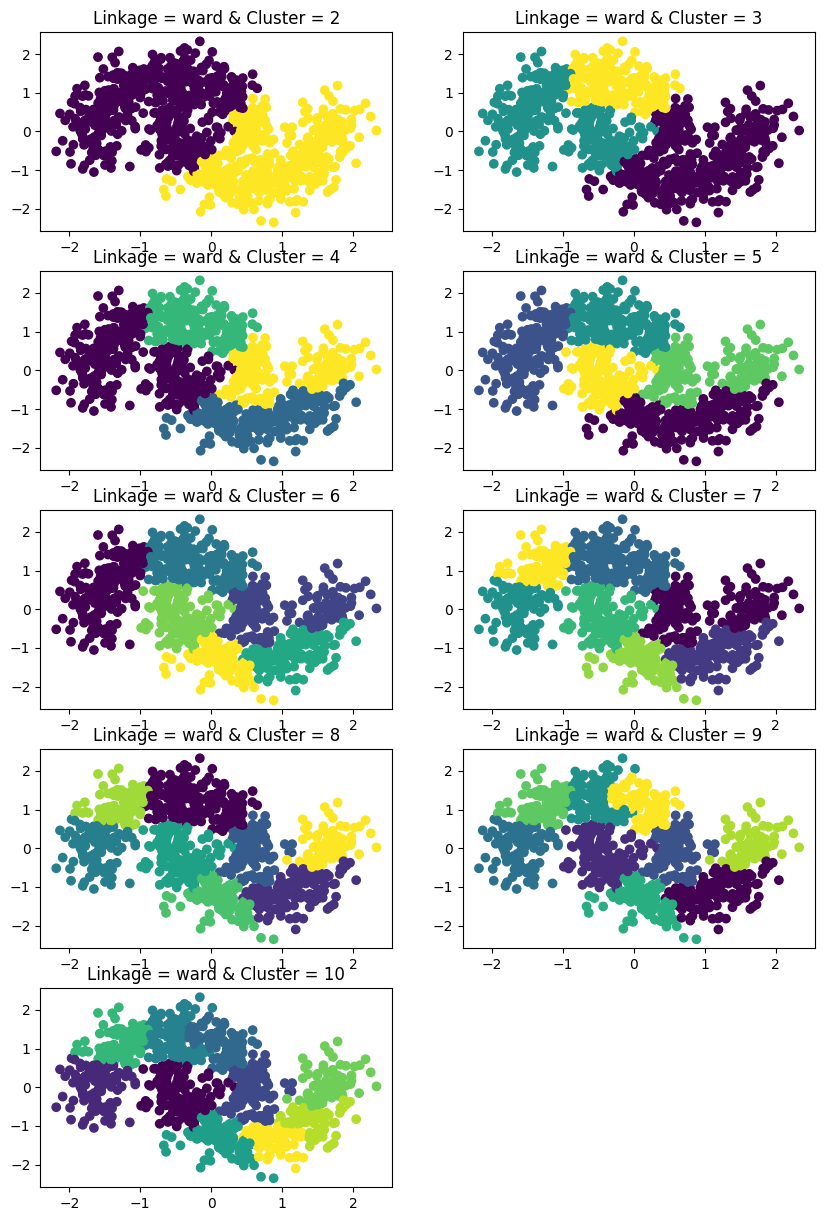

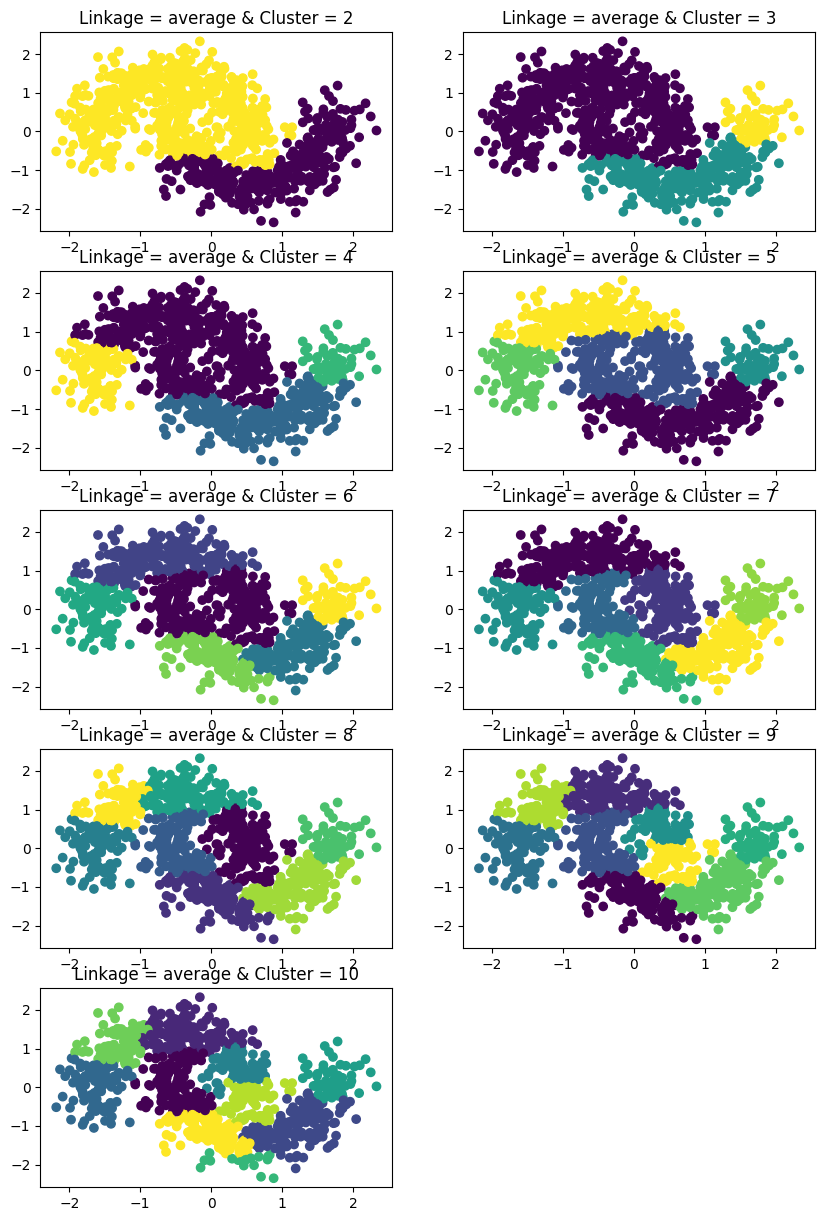

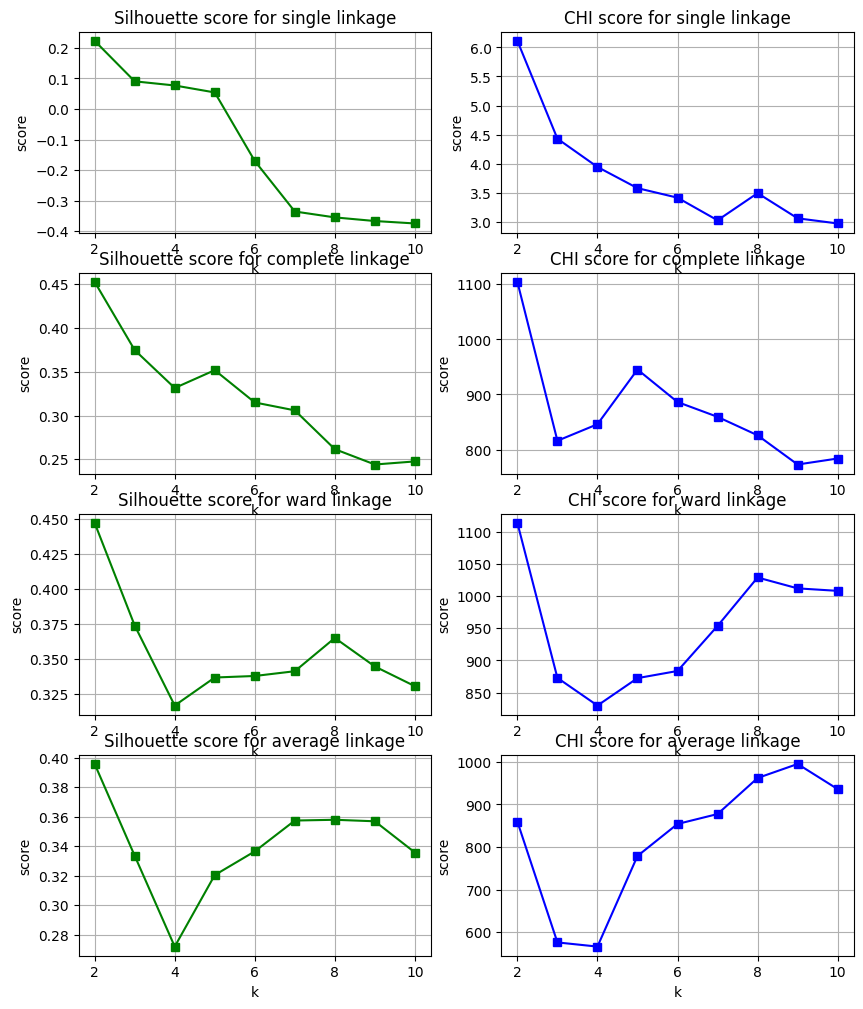

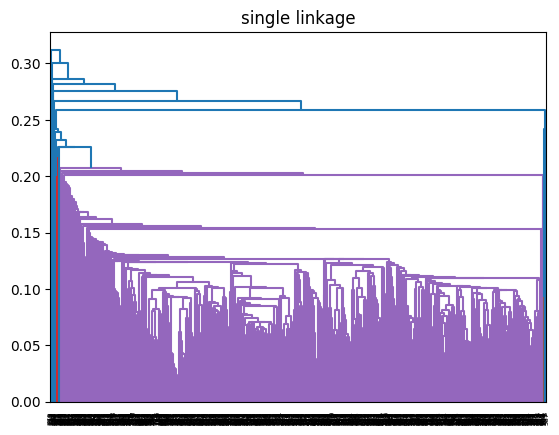

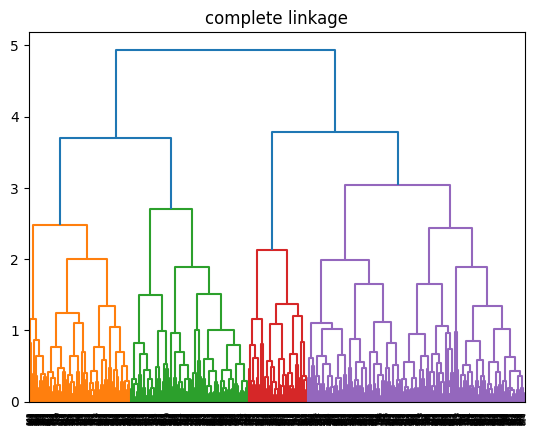

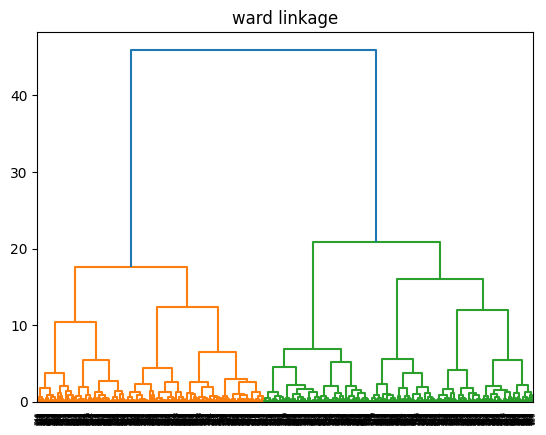

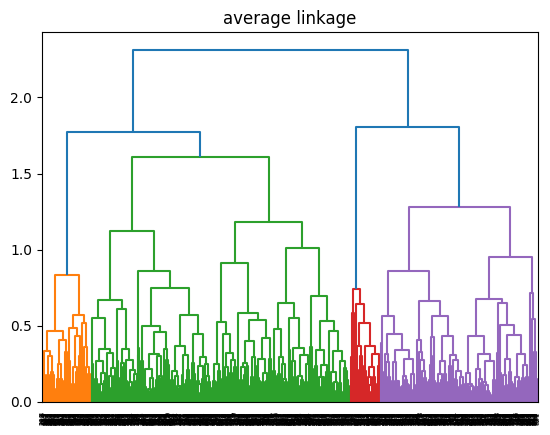

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage


def plot_agglo(X_scaled, link_choice=str):
    score_s = []
    score_chs = []
    for i in range(2, 11):
        agglo = AgglomerativeClustering(
            n_clusters=i,
            linkage=link_choice,
        )
        y_pred = agglo.fit_predict(X_scaled)
        agglo_model = agglo.fit(X_scaled)
        score_s.append(silhouette_score(X_scaled, agglo_model.labels_))
        score_chs.append(calinski_harabasz_score(X_scaled, agglo_model.labels_))

        plt.subplot(5, 2, i - 1)
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred)
        plt.title(f"Linkage = {link_choice} & Cluster = {i}")
    plt.gcf().set_size_inches(10, 15)
    plt.tight_layout
    return score_s, score_chs


def plot_score(k, score, color):
    plt.plot(k, score, color)
    plt.xlabel("k")
    plt.ylabel("score")
    plt.grid(True)
    plt.tight_layout


if __name__ == "__main__":
    # Part 1 ==================================================================
    # generate sample data.
    X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

    # scale the data.
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # plot scaled data.
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
    plt.title("Scaled moons data")
    plt.tight_layout
    plt.show()

    # Part 2 ==================================================================
    link_type = ["single", "complete", "ward", "average"]
    k_values = list(range(2, 11))
    list_s = []
    list_chs = []
    for link in link_type:
        score_s, score_chs = plot_agglo(X_scaled, link_choice=link)
        plt.show()
        list_s.append(score_s)
        list_chs.append(score_chs)

    # Part 3 ==================================================================
    i = 0
    for link in link_type:
        i += 1
        plt.subplot(4, 2, 2 * i - 1)
        plot_score(k_values, list_s[i - 1], "gs-")
        plt.title(f"Silhouette score for {link} linkage")
        # plt.ylim(0, 0.8)
        plt.subplot(4, 2, 2 * i)
        plot_score(k_values, list_chs[i - 1], "bs-")
        plt.title(f"CHI score for {link} linkage")
        # plt.ylim(0, 5000)
    plt.gcf().set_size_inches(10, 12)
    plt.show()

    # Part 4 ==================================================================
    for link in link_type:
        Z = linkage(X_scaled, link)
        dendrogram(Z)
        plt.title(f"{link} linkage")
        plt.show()
